# 1.  Recommender System with DL
## 1.1 추천 시스템과 딥러닝
**추천시스템에서 딥러닝을 활용하는 이유**

1. Nonlinear Transformation
- Deep Neural Network(DNN)은 data의 non-linearity를 효과적으로 나타낼 수 있다.
- => 복잡한 user-item interaction pattern을 효과적으로 모델링하여 user의 선호도를 예측할 수 있다.
<br></br>

2. Representation Learning
- DNN은 raw data로부터 feature representation을 학습해 사람이 직접 feature design하지 않아도 된다.
- => 텍스트, 이미지, 오디오 등 다양한 종류의 정보를 추천 시스템에 활용할 수 있다.
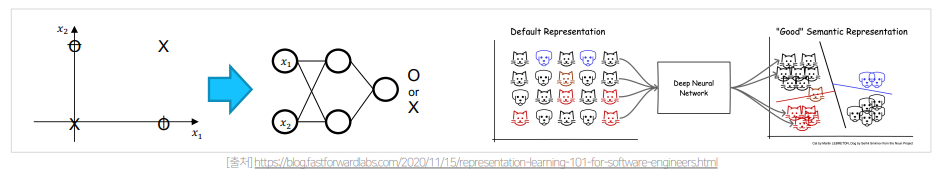

3. Sequence Modeling
- DNN은 자연어처리, 음성 신호 처리 등 sequential modeling task에서 성공적으로 적용된다.
- => 추천 시스템에서 next-item prediction, session-based recommendation에 사용된다.
<br></br>

4. Flexibility
- Tensorflow, PyTorch 등 다양한 DL 프레임워크 오픈
- => 추천시스템 모델링 flexibility가 높으며 더 효율적으로 서빙할 수 있다.
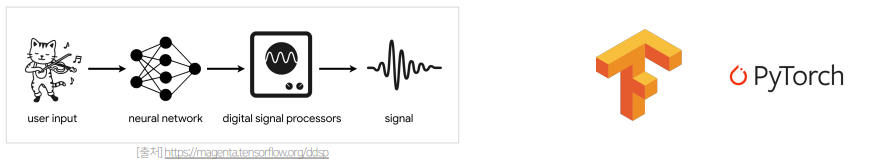

# 2. RecSys with MLP
## 2.1 Multi-Layer Perceptron
**다층 퍼셉트론(Multi-layer Perceptron, MLP)**

퍼셉트론으로 이루어진 layer 여러 개를 순차적으로 이어 놓은 feed-forward neural network

## 2.2 Neural Collaborative Filtering
**아이디어**

Matrix Factorization의 한계
- user와 item embedding의 선형 조합(linear combination)을 구한다.
- => user와 item 사이의 복잡한 관계를 표현하는 것에 한계를 가진다.
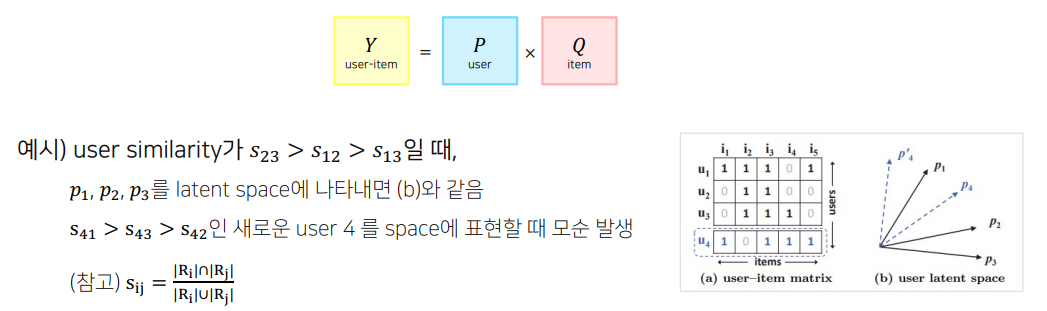

**모델(MLP 파트)** 
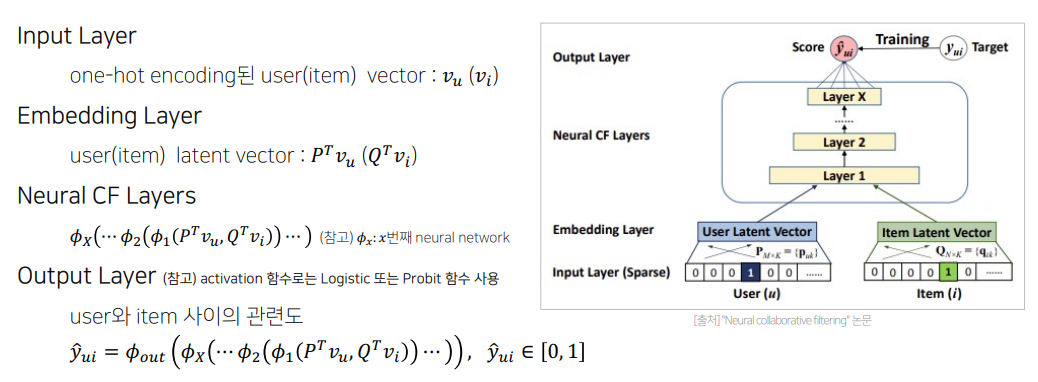

**모델(최종 모델)**
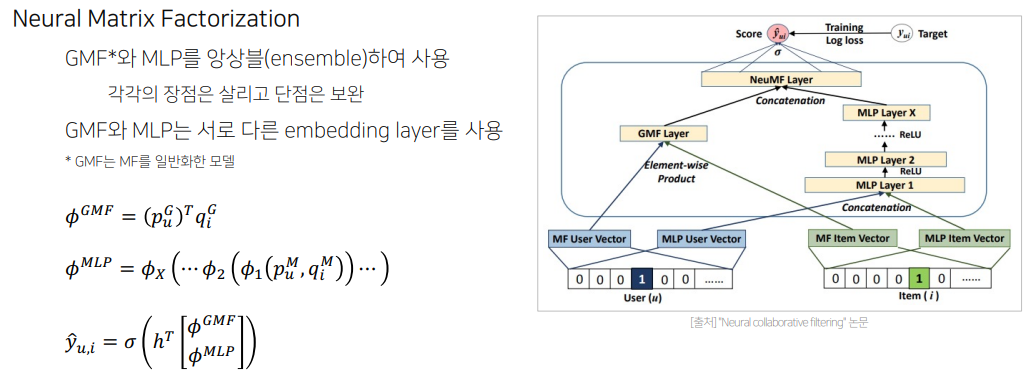

**결과**

MovieLens, Pinterest 데이터셋에 대하여 NCF의 추천 성능이 기존 MF(BPR)나 MLP모델보다 높다.
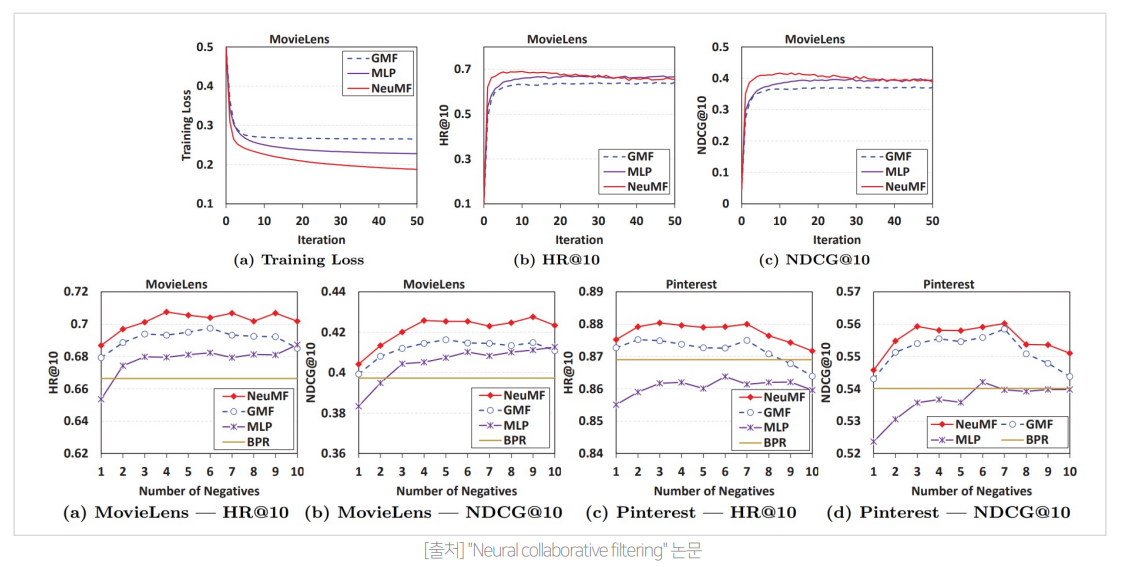

## 2.3 YouTube Recommendation
**유튜브 추천 문제 특징**

Scale
- 엄청 많은 유저와 아이템 vs. 제한된 컴퓨팅 파워 -> 효율적인 서빙과 이에 특화된 추천 알고리즘이 필요하다.
<br></br>

Freshness
- 잘 학습된 컨텐츠와 새로 업로드 된 컨텐츠를 실시간으로 적절히 조합해야 한다(exploration / exploitation)
<br></br>

Noise
- 높은 Sparsity, 다양한 외부 요인으로 유저의 행동을 예측하기 어렵다.
- => Implicit Feedback, 낮은 품질의 메타데이터를 잘 활용해야 한다.

**전체 구조 : 2단계 추천 시스템**

1. Candidate Generation
- High Recall 목표, 주어진 사용자에 대해 Top N 추천 아이템 생성
<br></br>

2. Ranking
- 유저, 비디어 피쳐를 좀 더 풍부하게 사용한다. 스코어를 구하고 최종 추천 리스트를 제공한다.
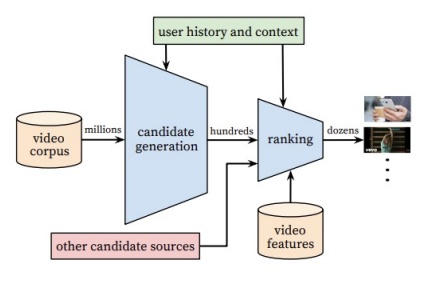

**Candidate Generation-문제 정의**
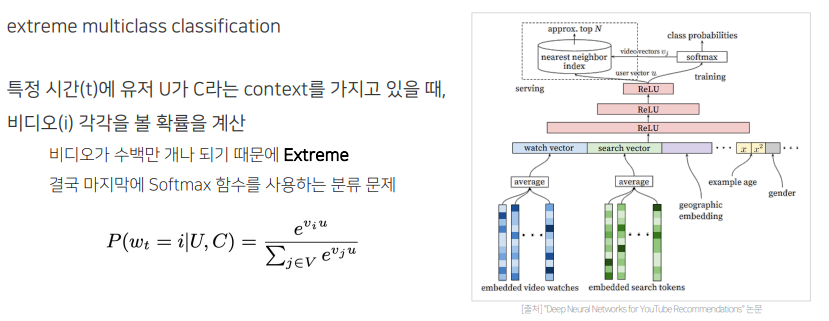

**Candidate Generation - 모델**

Watch Vector and Search Vector
- 과거 시청 이력과 검색 이력을 각각 임베딩한다. 마지막 검색어가 너무 큰 힘을 갖지 않도록 평균을 낸다.
<br></br>

Demographic & Geographic features
- 성별 등의 인구통계학 정보와 지리적 정보를 피쳐로 포함
<br></br>

'Example Age' features
- 모델이 과거 데이터 위주로 편향되어 학습되는 문제이다.
- 시청 로그가 학습 시점으로부터 경과한 정도를 피쳐로 포함한다.
- => Bootstraping 현상 방지 및 Freshness 제고.
<br></br>

다양한 피쳐 벡터들을 한 번에 concatenate
<br></br>

n개의 dense layer를 거쳐 User Vector 생성
<br></br>

최종 output layer는 비디오를 분류하는 softmax function.
<br></br>

Serving
- 유저를 input으로 하여 상위 N개 비디어를 추출한다.
- 학습 후 유저 벡터($u$)와 모든 비디오 벡터($v_j$)의 내적을 계산.
- $P(W_t = i|U,C) = \frac{e^{v_i\ u}}{\sum_{j\in V}e^{v_j\ u}}$
- 시간이 굉장히 오래 걸리기 때문에 Annoy, Faiss 같은 ANN 라이브러리를 사용하여 빠르게 서빙한다.

**Ranking-문제정의**

CG 단계에서 생성한 비디오 후보들을 input으로 하여 최종 추천될 비디오들의 순위는 매기는 문제이다.
<br></br>

Logistic 회귀를 사용하는 기본적인 방법
- 딥러닝 모델로 유저, 비디오 feature들을 풍부하게 사용하여 정확한 랭킹 스코어를 구한다.
<br></br>

loss function에 단순한 클릭 여부가 아닌 시청 시간을 가중치로 한 값을 반영한다.
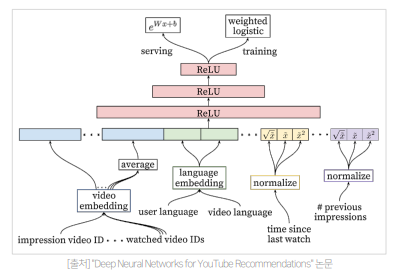

**Ranking - 모델**

user actions feature 사용
- 유저가 특정 채널에서 얼마나 많은 영상을 봤는지.
- 유저가 특정 토픽의 동영상을 본 지 얼마나 지났는지.
- 영상의 과거 시청 여부 등을 입력.
<br></br>

DL 구조보다는 도메인 전문가의 역량이 좌우하는 파트이다.
- 많은 Feature Selection / Engineering 필요.
<br></br>

네트워크를 통과한 뒤 비디오가 실제로 시청될 확률로 매핑한다.
- $P(watch) \in [0,1]$ * 시청여부만을 맞히는 CTR 예측
<br></br>

Loss function
- 단순 binary가 아닌 weighted cross-entropy loss를 사용.
- 비디오 시청 시간으로 가중치를 준다.
- 낚시성/광고성 콘텐츠를 업로드하는 어뷰징(abusing)을 감소시킨다.

**요약 및 결과**

딥러닝 기반 2단계 추천을 처음으로 제안한 논문
- Candidate Generation : 유저에게 적합한 수백개의 후보 아이템을 생성한다.
- Ranking : 더 rich한 피쳐를 사용하여 최종 추천 아이템 10~20개를 제공한다.
<br></br>

Candidate Generation - 기존 CF 아이디어 기반으로 다양한 피쳐를 사용해 추천 성능을 향상시켰다.
- 유저 : watch/query history, demographic, geographic 피쳐
- 아이템 : Example Age
<br></br>

Ranking - 과거에 많이 사용된 선형/트리 기반 모델보다 제안 딥러닝 모델이 더 뛰어난 성능을 보여줬다.
- Rich Feature : CG에서 사용한 피쳐 외에 더 많은 피쳐를 사용하여 Ranking
- 단순 CTR 예측이 아닌 Expected Watch Time을 예측했다.

# 3. RecSys with AE
## 3.1 Autoencoder
**오토인코더(Autoencoder, AE)**

입력 데이터를 출력으로 복원(reconstruct)하는 비지도(unsupervised)학습 모델이다.
- 중간 hidden layer를 input data의 feature representation으로 활용한다.
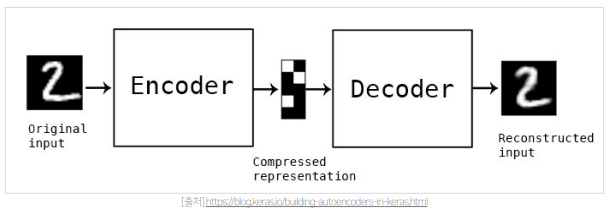

**디노이징 오토인코더(Denoising Autoencoder, DAE)**

입력 데이터에 random noise나 dropout을 추가하여 학습한다.

noisy input을 더 잘 복원할 수 있는 robust한 모델이 학습되어 전체적인 성능이 향상된다.
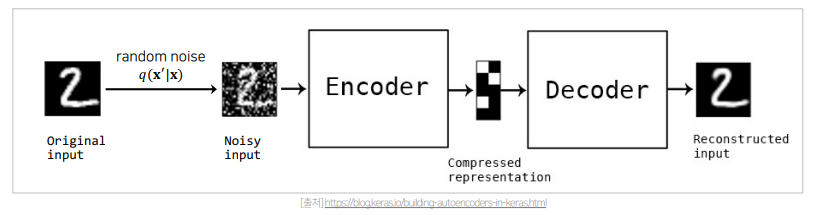

## 3.2 AutoRec
**아이디어**

Rating Vector를 입력과 출력으로 하여 Encoder & Decoder Reconstruction 과정을 수행한다.
- 유저 또는 아이템 벡터를 저차원의 latent feature로 나타내 이를 사용해 평점을 예측한다
- Autoencoder의 representation learning을 유저와 아이템에 적용한 것이다.
<br></br>

vs. MF
- MF는 linear, low-order interaction을 통한 representation이 학습되지만,
- AutoRec은 non-linear activation function을 사용하므로 더 복잡한 interaction 표현이 가능하다.

**모델**
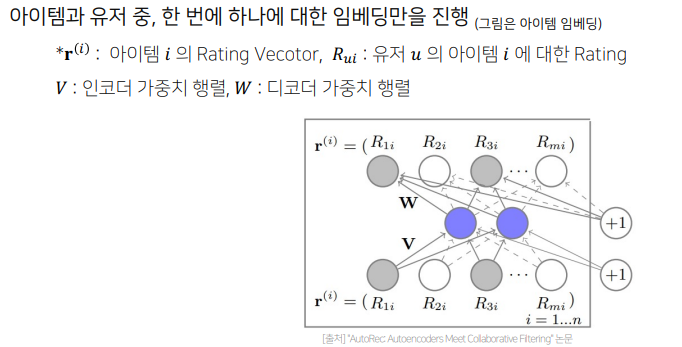

**학습**
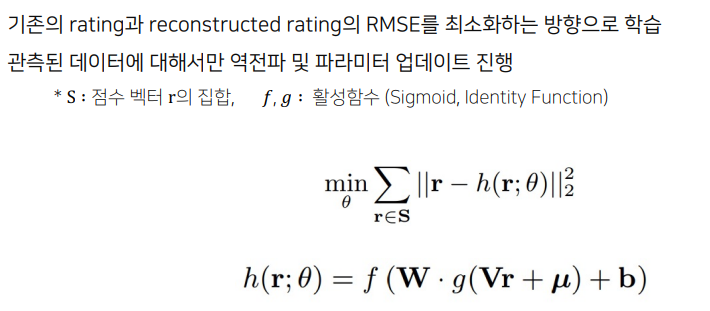

**결과**

무비렌즈(ML)와 넷플릭스 데이터셋에서 RBM, MF 등의 모델보다 좋은 성능을 냈다.

Hidden unit의 개수가 많아질 수록 RMSE가 감소합을 보였다.
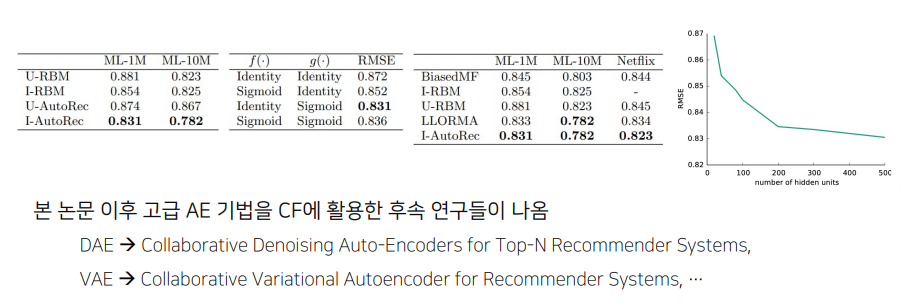

## 3.3 CDAE
**모델 특징**

AutoRec vs. CDAE
- AutoRec이 Rating Prediction을 위한 모델이었다면,
- CDAE는 Ranking을 통해 유저에게 Top-N 추천을 제공하는 모델이다.
<br></br>

문제 단순화를 위해, 유저-아이템 상호 작용 정보를 이진정보로 바꿔서 학습 데이터로 사용한다.
- 개별 유저에 대해서 아이템의 rating이 아닌 preference를 학습하게 된다.

**문제 정의 및 모델**
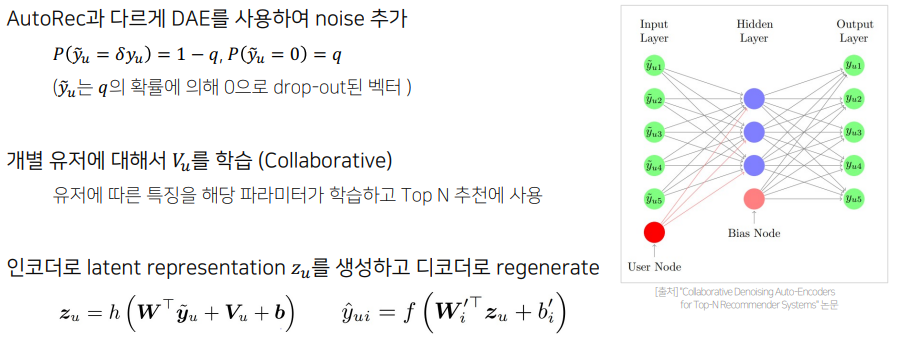

**결과 및 요약**

대체적으로 N에 관계 없이 다른 top-N 추천 모델에 비해 더 높은 MAP와 recall을 보였다.
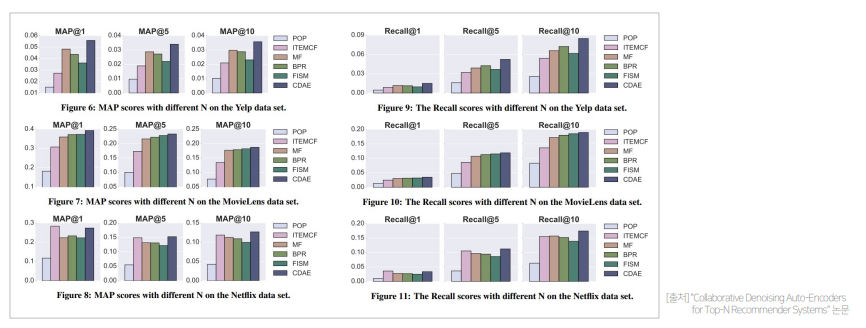